<a href="https://colab.research.google.com/github/SOWMIYA-BALACHANDAR/PRASUNET-MACHINE-LEARNING/blob/main/ML_TASK_4_HAND_GESTURE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A HAND GESTURE RECOGNITION MODEL THAT CAN ACCURATELY IDENTIFY AND CLASSIFY DIFFERENT HAND GESTURES FROM IMAGE OR VIDEO DATA, ENABLING INTUITIVE HUMAN-COMPUTER INTERACTION AND GESTURE-BASED CONTROL SYSTEMS**

**Import libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

**Load CSV files**

In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/gesture/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/gesture/sign_mnist_test.csv')

**Inspect the data**

In [ ]:
print("Training data:")
print(train_df.head())
print("\nTest data:")
print(test_df.head())

Training data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206    

**Visualize Distribution of Pixel Values**


Distribution of pixel values in training data:


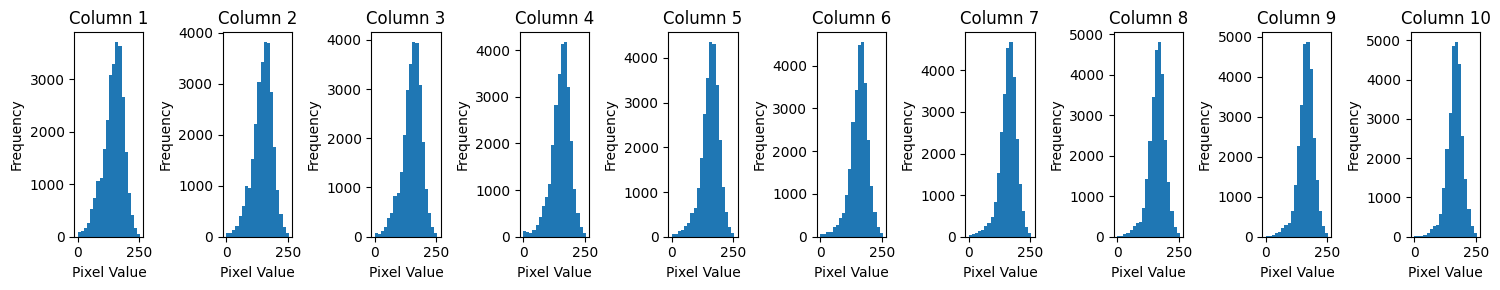

Distribution of pixel values in test data:


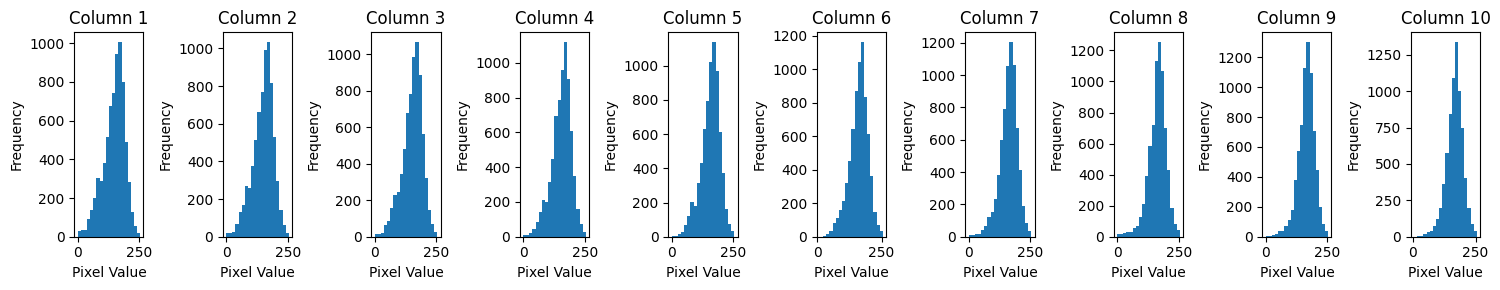

In [ ]:
def plot_column_distribution(df):
    n_cols = min(df.shape[1], 10)  # Limit to 10 columns for visualization
    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(15, 3))

    for i in range(n_cols):
        column_data = df.iloc[:, i]
        axes[i].hist(column_data, bins=20)
        axes[i].set_title(f'Column {i+1}')
        axes[i].set_xlabel('Pixel Value')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

print("Distribution of pixel values in training data:")
plot_column_distribution(train_df.drop('label', axis=1))

print("Distribution of pixel values in test data:")
plot_column_distribution(test_df.drop('label', axis=1))


**Extract labels and pixel values from the CSV files**

In [14]:
train_labels = train_df['label'].values
train_pixels = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1)  # Reshape into 28x28 images
print(train_pixels.shape)

(27455, 28, 28, 1)


In [15]:
test_labels = test_df['label'].values
test_pixels = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1)  # Reshape into 28x28 images
print(test_pixels.shape)

(7172, 28, 28, 1)


**Normalize pixel values to range [0, 1]**

In [16]:
train_pixels = train_pixels / 255.0
print(train_pixels.shape)

(27455, 28, 28, 1)


In [17]:
test_pixels = test_pixels / 255.0
print(test_pixels.shape)

(7172, 28, 28, 1)


**Calculate num_classes based on unique labels in both train and test sets**

In [19]:
num_classes = len(np.unique(np.concatenate((train_labels, test_labels)))) + 1
print(num_classes)

25


**Convert labels to categorical one-hot encoding**

In [20]:
train_labels = to_categorical(train_labels, num_classes=num_classes)
print(train_labels.shape)

(27455, 25)


In [21]:
test_labels = to_categorical(test_labels, num_classes=num_classes)
print(test_labels.shape)

(7172, 25)


**Calculate correlation matrix**

In [ ]:
train_corr = np.corrcoef(train_pixels.reshape(train_pixels.shape[0], -1), rowvar=False)
print(train_corr.shape)

(784, 784)


**Plot correlation matrix**

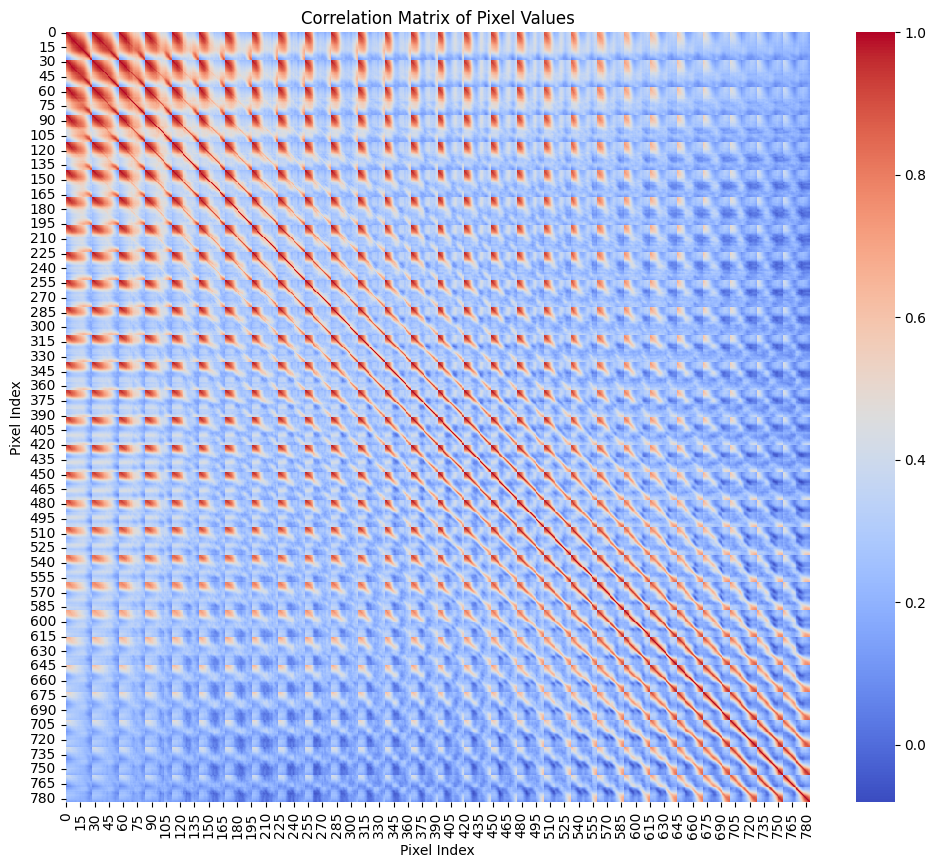

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_corr, cmap='coolwarm', annot=False, cbar=True)
plt.title('Correlation Matrix of Pixel Values')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Index')
plt.show()

**Build the model**

In [23]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

**Compile the model**

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Summary of the model**

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

**Train the model**

In [8]:
history = model.fit(
    train_pixels, train_labels,
    batch_size=32,
    epochs=10,
    validation_data=(test_pixels, test_labels)
)

# Save the model
model.save('hand_gesture_recognition_model.h5')


Epoch 1/10
858/858 [==============================] - 34s 38ms/step - loss: 1.4205 - accuracy: 0.5555 - val_loss: 0.5449 - val_accuracy: 0.8147
Epoch 2/10
858/858 [==============================] - 31s 36ms/step - loss: 0.3850 - accuracy: 0.8711 - val_loss: 0.2946 - val_accuracy: 0.8922
Epoch 3/10
858/858 [==============================] - 34s 40ms/step - loss: 0.2070 - accuracy: 0.9299 - val_loss: 0.3372 - val_accuracy: 0.9087
Epoch 4/10
858/858 [==============================] - 33s 38ms/step - loss: 0.1413 - accuracy: 0.9498 - val_loss: 0.3093 - val_accuracy: 0.9152
Epoch 5/10
858/858 [==============================] - 32s 37ms/step - loss: 0.1026 - accuracy: 0.9647 - val_loss: 0.3363 - val_accuracy: 0.9168
Epoch 6/10
858/858 [==============================] - 44s 51ms/step - loss: 0.0907 - accuracy: 0.9686 - val_loss: 0.3317 - val_accuracy: 0.9301
Epoch 7/10
858/858 [==============================] - 33s 38ms/step - loss: 0.0723 - accuracy: 0.9745 - val_loss: 0.3429 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Plot training & validation accuracy values**

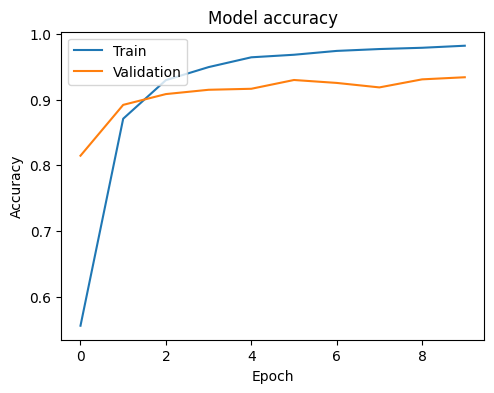

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


**Plot training & validation loss values**

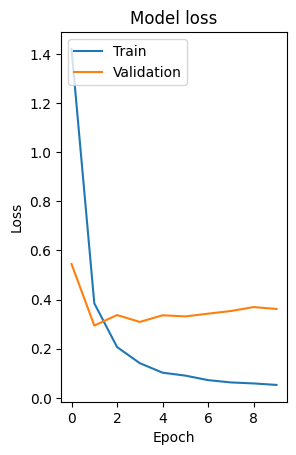

In [28]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Load the trained model
from tensorflow.keras.models import load_model

model = load_model('hand_gesture_recognition_model.h5')

1/1 [==============================] - 1s 607ms/step
Predicted class: [6]


**Make predictions**

In [29]:
predictions = model.predict(test_pixels)

predicted_labels = np.argmax(predictions, axis=1)

print("Predicted labels:")
print(predicted_labels)


225/225 [==============================] - 2s 9ms/step
Predicted labels:
[22 22 22 ...  8 22  8]


**Display predictions**

In [30]:
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted classes for test samples:")
for i, pred_class in enumerate(predicted_classes):
    print(f"Sample {i + 1}: Predicted class {pred_class}")


Streaming output truncated to the last 5000 lines.
Sample 2173: Predicted class 22
Sample 2174: Predicted class 22
Sample 2175: Predicted class 22
Sample 2176: Predicted class 22
Sample 2177: Predicted class 22
Sample 2178: Predicted class 22
Sample 2179: Predicted class 10
Sample 2180: Predicted class 22
Sample 2181: Predicted class 22
Sample 2182: Predicted class 22
Sample 2183: Predicted class 22
Sample 2184: Predicted class 22
Sample 2185: Predicted class 22
Sample 2186: Predicted class 22
Sample 2187: Predicted class 11
Sample 2188: Predicted class 22
Sample 2189: Predicted class 8
Sample 2190: Predicted class 22
Sample 2191: Predicted class 22
Sample 2192: Predicted class 22
Sample 2193: Predicted class 22
Sample 2194: Predicted class 8
Sample 2195: Predicted class 8
Sample 2196: Predicted class 8
Sample 2197: Predicted class 22
Sample 2198: Predicted class 22
Sample 2199: Predicted class 22
Sample 2200: Predicted class 11
Sample 2201: Predicted class 22
Sample 2202: Predicted cl

**Evaluate accuracy**

In [ ]:
true_labels = test_df['label'].values

accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy on test data: {accuracy}")


Accuracy on test data: 0.9343279419966537
